# Домашнее задание 4 

## Импорт необходимых библиотек 


In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

import scipy.stats

from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

import math
from tqdm import tqdm
import random

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('data\students_exam.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

Или

$$
\begin{aligned}
& H_0: \mu_{high} - \mu_{middle}  = 0 \\
& H_1: \mu_{high} - \mu_{middle} > 0
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [5]:
# Получим необходимые выборки
biborka1 = df[(df['parental level of education'] == "associate's degree") | (df['parental level of education'] == "bachelor's degree") | (df['parental level of education'] == "master's degree")]['math score']
biborka2 = df[(df['parental level of education'] == "(high school") | (df['parental level of education'] == "some high school")| (df['parental level of education'] == "some college")]['math score']
sred1 = biborka1.mean()
sred2 = biborka2.mean()
len1 = len(biborka1)
len2 = len(biborka2)
# Проверим, раны ли дисперсии
print(biborka1.var(), biborka2.var()) #они крайне похожи по значениям
# (⌒_⌒)

226.5915416682412 229.1312553477571


399
405


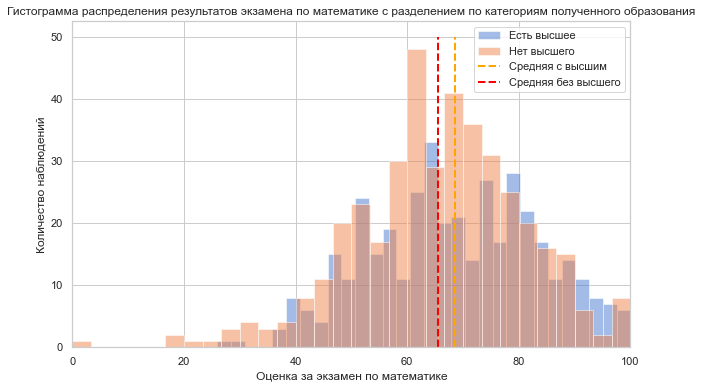

In [6]:
#Посмотрим, как распределены значения в выборках

print(biborka1.count())
print(biborka2.count())

plt.figure(figsize=(10, 6))
plt.hist(biborka1, bins = 30, alpha = 0.5, rwidth = 2, label= 'Есть высшее')
plt.hist(biborka2, bins = 30,alpha = 0.5, rwidth = 2, label= 'Нет высшего')
plt.vlines(sred1, 0, 50, color='orange', lw=2, linestyles='--', label='Средняя с высшим')
plt.vlines(sred2, 0, 50, color='red', lw=2, linestyles='--', label='Средняя без высшего')
plt.show
plt.title(f'Гистограмма распределения результатов экзамена по математике с разделением по категориям полученного образования')
plt.xlabel("Оценка за экзамен по математике")
plt.ylabel("Количество наблюдений")
plt.xlim((0, 100))
plt.legend()
None

Посмотрим, насколько выборки совпадают с нормальным (стандатризированные распределения):

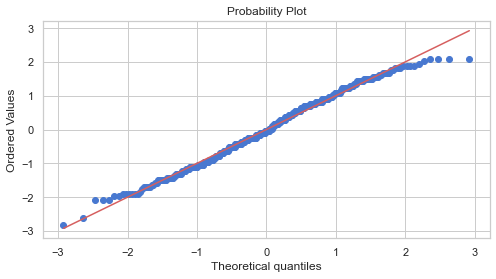

In [7]:
x_scale = (biborka1 - sred1)/biborka1.std()
sts.probplot(x_scale, dist="norm", plot=plt);

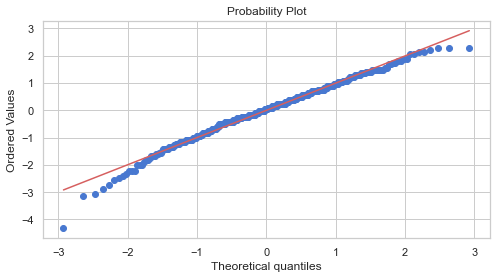

In [8]:
x_scale = (biborka2 - sred2)/biborka2.std()
sts.probplot(x_scale, dist="norm", plot=plt);

**Вывод:** Обе выборки имеют нечто общее с нормальным, но все же их хвосты смещены, а также сами они (особенно, где есть высшее) распределены нехарактерно волатильно для обычного нормального распределения. Более того, наши выборки имеют значительный n (почти 400), что означает качественную применимость ЗБЧ для теста и, как следствие, именно Z-теста, хорошо работающего на больших выборках.

Однако не все так гладко: выборка с средним образованием имеет значительные выбросы, что моожет означать "неодинаковость" распределенности случайных величин, что серьезно мешает проведению параметрических тестов (i.i.d - одно из 3 условий применения обоих тестов)

In [9]:
#Код из 12го семинара
raznitsa = sred1 - sred2
raznitsa_std = np.sqrt(biborka1.var(ddof = 1)/len1 + biborka2.var(ddof = 1)/len2)
z_statistika = raznitsa + 0 /raznitsa_std 
print(z_statistika) #Отнормировали разницу матожиданий к стандартному нормальному распределеню через ЗБЧ. Получили значение статистики

#Так как интервал правосторонний, то всесь уровень значимости 0.05 будет идти на один хвост. Подберем значение из норм. распр.
crit = sts.norm(0,1).ppf(1 - 0.05)
print(crit)

3.0805532349392024
1.6448536269514722


In [10]:
#https://www.statology.org/p-value-from-z-score-python/
alpha = sts.norm.sf(crit) #для проаерки
pval = sts.norm.sf(z_statistika)
alpha, pval

(0.050000000000000044, 0.0010330820777131574)

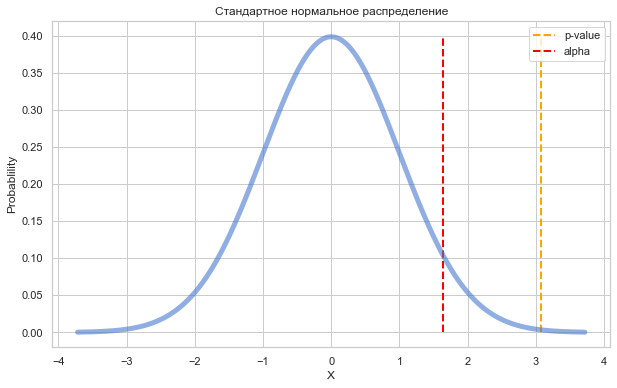

In [11]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
plt.figure(figsize=(10, 6))
x = np.linspace(norm.ppf(0.0001),
                norm.ppf(0.9999), 10000)
plt.plot(x, norm.pdf(x, loc=0, scale=1), lw=5, alpha=0.6)
plt.vlines(z_statistika, 0, 0.4, color='orange', lw=2, linestyles='--', label='p-value')
plt.vlines(crit, 0, 0.4, color='red', lw=2, linestyles='--', label='alpha')
plt.show
plt.title(f'Стандартное нормальное распределение')
plt.xlabel("X")
plt.ylabel("Probablility")
plt.legend()
None

**Вывод:** Значение z-статистики находится далеко за пределами критической области, поэтому нулувую гипотезу необхоимо отвергнуть

In [12]:
# Ради интереса проведем встроенный в сайпай автоматический z-тест.
ztest(biborka1, biborka2, value=0)  #Тест вывел значение стандартного нормального распределения и соответствующее pvalue
#как и следовало из предыдущих расчетов, гипотеза отвергается

(2.89314513571049, 0.003814050100762185)

На курсе по матстату я понял, что t тест использвуется тогда, когда не известна истинная дисперсия. Поэтому не уверен, что все предыдущие записи подходят для данной выборки. Хотя на одном из последних семинарах по проверке гипотез говорили, что в целом на практике никто не различает данные тесты, ведь при больших n распределение Стьюдента все равно стремится к нормальному
#### На всякий случай проведем t-тест

In [13]:
# И t-тест (учитем, что дисперсии практически равны)
scipy.stats.ttest_ind(biborka1, biborka2, equal_var = True)
#как и следовало из предыдущих расчетов, гипотеза отвергается

Ttest_indResult(statistic=2.89314513571049, pvalue=0.003917368572215276)

**Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?**

**Ответ:** 

* Проверку гипотезы начали с самого обычного параметрического z-теста, так как 1)большие выборки, 2)распределения немного отличаются от нормального, 3)гипотеза о матожидании. 

* Однако были факторы, которые мешают применению данного теста: в выборке должны быть только независимо и одинаково распределенные случайне величины, однако в наблюдениях заметны значительные выбросы, что по идее должно отвергать предпосылку iid 

* В аргумент к применению t-теста можно привести тот факт, что нам не известна истинная дисперсия, а только выборочная

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [14]:
biborka3 = df['math score']
biborka4 = df['reading score']
sred3 = biborka3.mean()
sred4 = biborka4.mean()
len3 = len(biborka3)
len4 = len(biborka4)
# Проверим, равны ли дисперсии
print(biborka3.var(), biborka4.var())
# (＠_＠)

229.91899799799847 213.1656046046047


1000
1000


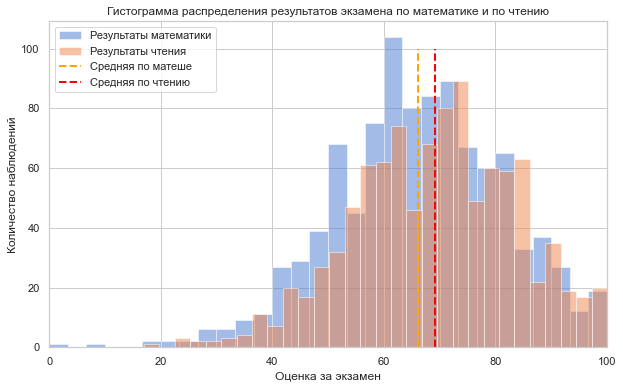

In [15]:
#Посмотрим, как распределены значения в выборках

print(biborka3.count())
print(biborka4.count())

plt.figure(figsize=(10, 6))
plt.hist(biborka3, bins = 30, alpha = 0.5, rwidth = 2, label= 'Результаты математики')
plt.hist(biborka4, bins = 30,alpha = 0.5, rwidth = 2, label= 'Результаты чтения')
plt.vlines(sred3, 0, 100, color='orange', lw=2, linestyles='--', label='Средняя по матеше')
plt.vlines(sred4, 0, 100, color='red', lw=2, linestyles='--', label='Средняя по чтению')
plt.show
plt.title(f'Гистограмма распределения результатов экзамена по математике и по чтению')
plt.xlabel("Оценка за экзамен")
plt.ylabel("Количество наблюдений")
plt.xlim((0, 100))
plt.legend()
None

In [16]:
#Код из 12го семинара, гипотеза двустороняя
raznitsa = sred3 - sred4
raznitsa_std = np.sqrt(biborka3.var(ddof = 1)/len3 + biborka4.var(ddof = 1)/len4)
z_statistika = raznitsa + 0 /raznitsa_std 
print(z_statistika) #Отнормировали разницу матожиданий к стандартному нормальному распределеню через ЗБЧ. Получили значение статистики

#Так как интервал правосторонний, то всесь уровень значимости 0.05 будет идти на один хвост. Подберем значение из норм. распр.
crit_down = sts.norm(0,1).ppf(0.05/2)
crit_up = sts.norm(0,1).ppf(1 - 0.05/2)
print(crit_down, crit_up)

-3.0799999999999983
-1.9599639845400545 1.959963984540054


**Гипотеза о равенстве матожиданий отвергается**

In [17]:
alpha1 = sts.norm.sf(crit_down) #для проаерки
alpha2 = sts.norm.sf(crit_up) #для проаерки
pval = sts.norm.sf(abs(z_statistika))
alpha1, alpha2, pval

(0.975, 0.025, 0.0010350029748028477)

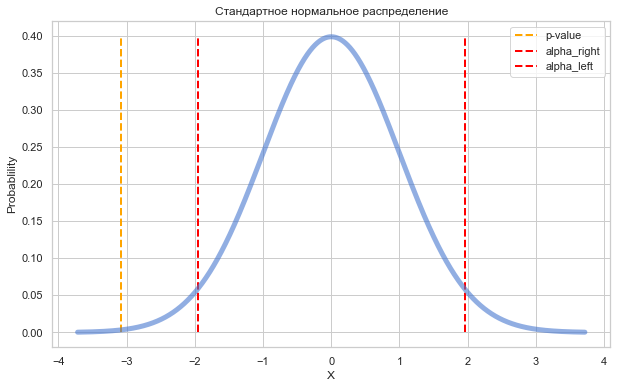

In [18]:
plt.figure(figsize=(10, 6))
x = np.linspace(norm.ppf(0.0001),
                norm.ppf(0.9999), 10000)
plt.plot(x, norm.pdf(x, loc=0, scale=1), lw=5, alpha=0.6)
plt.vlines(z_statistika, 0, 0.4, color='orange', lw=2, linestyles='--', label='p-value')
plt.vlines(crit_up, 0, 0.4, color='red', lw=2, linestyles='--', label='alpha_right')
plt.vlines(crit_down, 0, 0.4, color='red', lw=2, linestyles='--', label='alpha_left')
plt.show
plt.title(f'Стандартное нормальное распределение')
plt.xlabel("X")
plt.ylabel("Probablility")
plt.legend()
None

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 

* В целом данные распределны также околонормально, как и в первом пункте. Дисперсии примерно равны, выборки большие, есть выбросы, из-за которых выборки получаются смещенными вправо
* Также не выполняется предпосылка о независимости
* Однако другие тесты проводить нет необходимости, так как здесь pvalue явно оказывается очень далеко от области не отвержения гипотезы

#### На всякий случай проведем t-тест еще раз

In [19]:
# И t-тест (учитем, что дисперсии практически равны)
scipy.stats.ttest_ind(biborka3, biborka4, equal_var = True)
#как и следовало из предыдущих расчетов, гипотеза отвергается

Ttest_indResult(statistic=-4.627084038100885, pvalue=3.946445546435526e-06)

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [20]:
df = pd.read_csv('data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

In [21]:
df.head()

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

Или

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 - p_2 = 0 \\
&H_1: \hspace{2mm} p_1 - p_2 > 0
\end{aligned}
$$

In [22]:
kto = df[df['STUDY'] == 1]['DECISION']
chto = df[df['STUDY'] == 2]['DECISION']
p_kto = kto.sum() / len(kto)
p_chto = chto.sum() / len(chto)
print(p_kto, p_chto)
# (￢_￢) 

0.8645833333333334 0.7469879518072289


In [23]:
#Односторонняя гипотеза
z, p = proportions_ztest([sum(kto), sum(chto)], [len(kto), len(chto)])
print("Z stat:", z)
crit_up = sts.norm(0,1).ppf(1 - 0.05)
print('Z crit:', crit_up)
#Гипотеза о равенстве долей отвергается

Z stat: 2.3780989461645565
Z crit: 1.6448536269514722


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 

* Для проверки гипотезы о равенстве долей как и во всех других гипотезах необходимо, чтобы X1,...Xn были независимыми и одинаково распределенными случайными величинами

* Также на лекциях в качестве квантиля для сравнения мы всегда использовали именно z-статистику

* Также в какой-то презентации МГУ я нашел занимательный факт о том, что данная проверка не эффектива, если nq^ и np^ меньше 5 (то есть объем выборок должен быть больше определенного значения): https://mse.msu.ru/wp-content/uploads/2020/03/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F-7-%D0%94%D0%B2%D0%B5-%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8-%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9-%D0%BC%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB.pdf

Посчитаем выборочные доли:

In [24]:
print(p_kto * len(kto), p_chto * len(chto))
# Тест эффективен

166.0 62.0


__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

275


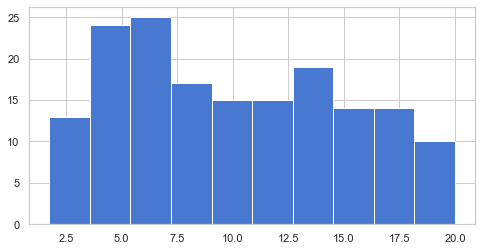

In [25]:
#https://www.probabilitycourse.com/chapter8/8_4_3_hypothesis_testing_for_mean.php
kogda = df['RT']
# (⊙_⊙)
print(len(kogda))
plt.hist(kogda) #Распределение ближе к равномерному (то есть не похоже на нормальное)
None

Если выборка большая (а она большая: 275 наблюдений), распределение в нем не похоже на нормальное (наш случай), то оценка строится иходя из следующей нормализации: (Xср - E(x))/(Std/sqrt(n))

In [26]:
z_stat = (kogda.mean() - 5)/(kogda.std(ddof = 1)/ np.sqrt(len(kogda)))
z_crit = sts.norm(0,1).ppf(0.95)

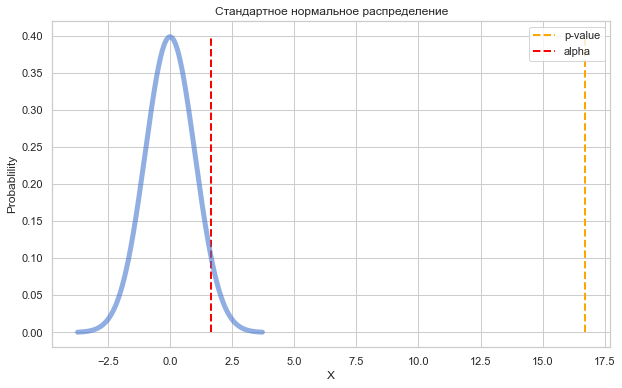

In [27]:
plt.figure(figsize=(10, 6))
x = np.linspace(norm.ppf(0.0001),
                norm.ppf(0.9999), 10000)
plt.plot(x, norm.pdf(x, loc=0, scale=1), lw=5, alpha=0.6)
plt.vlines(z_stat, 0, 0.4, color='orange', lw=2, linestyles='--', label='p-value')
plt.vlines(z_crit, 0, 0.4, color='red', lw=2, linestyles='--', label='alpha')
plt.show
plt.title(f'Стандартное нормальное распределение')
plt.xlabel("X")
plt.ylabel("Probablility")
plt.legend()
None

**Вывод:** Гипотеза о том, что люди кровожадны отвергается, так как z статистика улетела очень далеко

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__

* Большая выборка, но не изветсна истинная дисперсия. Также распределеное далеко от нормального - оно равномерное. У наблюдений нет выборосов, поэтому предпосылка о независимости и одинаковой распределенности выполняется

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [28]:
# Из мужчин приняли лекарство 770 + 880, а выздоровели 770
print(770/(770+880))
# Не принимало лекарство 88 + 135 мужчин, а выздоровели из них 88
print(88/(88+135))
# Большая доля выздоровевших в выборке наблюдается у тех мужчин, кто принимал лекарства
# (◕‿◕)♡

0.4666666666666667
0.39461883408071746


Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [29]:
muzh = np.array([[770,880],
                [88,135]])
zhen = np.array([[165,80],
                [440,310]])
vse = np.array([[935,960],
                [528,445]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [30]:
chi, pvalue, k, _ = chi2_contingency(muzh, correction=False)
print("Значение статистики Пирсона:", chi, "P-value:", pvalue, "Кол-во степеней свободы:", k)
print('Критическое значение Хи-квадрата, при котором гипотеза отвергается:', stats.chi2.ppf(0.95, df = 1))
# (￢_￢) 

Значение статистики Пирсона: 4.107854906463222 P-value: 0.04268446899604581 Кол-во степеней свободы: 1
Критическое значение Хи-квадрата, при котором гипотеза отвергается: 3.841458820694124


**Вывод:** Гипотеза об однородности выборок отвергается, то есть лекарство влияет на мужчин. Однако наблюдаемое значение крайне близко к критическому, поэтому эффект хоть и статистически значим, однако не так сильно заметен

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [31]:
print("Всего в выборке", muzh.sum(), "мужчин")
# (￢_￢) 

Всего в выборке 1873 мужчин


Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [32]:
n1 = muzh.sum(axis = 1)[0]
n2 = muzh.sum(axis = 1)[1]
print("Лекарство принимало", n1, "мужчин, а не принемало", n2)
# (￢_￢) 

Лекарство принимало 1650 мужчин, а не принемало 223


Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [33]:
healthy = muzh.sum(axis = 0)[0] / muzh.sum()
unhealthy = muzh.sum(axis = 0)[1] / muzh.sum()
print("Доля выздоровевших мужчин составляет", round(healthy,3))
# (￢_￢) 

Доля выздоровевших мужчин составляет 0.458


Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [34]:
#Для принимавших:
a1 = n1 * healthy
a2 = n1 * unhealthy
a3 = n2 * healthy
a4 = n2 * unhealthy
ozhidaniya = np.array([[a1,a2],
                [a3,a4]])
print(ozhidaniya)
# (￢_￢) 

[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [35]:
chubbs = ((muzh[0][0] - ozhidaniya[0][0])**2)/ozhidaniya[0][0] + ((muzh[0][1] - ozhidaniya[0][1])**2)/ozhidaniya[0][1] + ((muzh[1][0] - ozhidaniya[1][0])**2)/ozhidaniya[1][0] + ((muzh[1][1] - ozhidaniya[1][1])**2)/ozhidaniya[1][1]
pval = 1 - sts.chi2.cdf(chubbs, df = 1)
print("Статистика:", chubbs, "P-value:", pval, "Критический Хи-квадрат:", stats.chi2.ppf(0.95, df = 1))
# (￢_￢) 

Статистика: 4.107854906463222 P-value: 0.04268446899604583 Критический Хи-квадрат: 3.841458820694124


**Вывод:** Получили то же значение, гипотеза не отвергается

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [36]:
zhen = np.array([[165,80],
                [440,310]])
n1 = zhen[0][0] / zhen.sum(axis = 1)[0]
n2 = zhen[1][0] / zhen.sum(axis = 1)[1]
print("Выздоровели и принимали", n1, "Выздоровели, но не принимали", n2)
# (￢_￢) 

Выздоровели и принимали 0.673469387755102 Выздоровели, но не принимали 0.5866666666666667


Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [37]:
chi, pvalue, k, _ = chi2_contingency(zhen, correction=False)
print("Значение статистики Пирсона:", chi, "PVAL:", pvalue, "Кол-во степеней свободы:", k)
print('Критическое значение Хи-квадрата, при котором гипотеза отвергается:', stats.chi2.ppf(0.95, df = 1))
# (￢_￢) 

Значение статистики Пирсона: 5.838444095586957 PVAL: 0.015679686056826774 Кол-во степеней свободы: 1
Критическое значение Хи-квадрата, при котором гипотеза отвергается: 3.841458820694124


**Вывод:** Гипотеза об однородности выборок отвергается, то есть лекарство влияет на женщин, причем значительно сильнее, чем на мужчин

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [38]:
chi, pvalue, k, _ = chi2_contingency(vse, correction=False)
print("Значение статистики Пирсона:", chi, "PVAL:", pvalue, "Кол-во степеней свободы:", k)
print('Критическое значение Хи-квадрата, при котором гипотеза отвергается:', stats.chi2.ppf(0.95, df = 1))
# (￢_￢) 
# (￢_￢) 

Значение статистики Пирсона: 6.239588767305169 PVAL: 0.012492547994073244 Кол-во степеней свободы: 1
Критическое значение Хи-квадрата, при котором гипотеза отвергается: 3.841458820694124


In [39]:
n1 = vse[0][0] / vse.sum(axis = 1)[0]
n2 = vse[1][0] / vse.sum(axis = 1)[1]
print("Выздоровели и принимали", n1, "Выздоровели, но не принимали", n2)

Выздоровели и принимали 0.49340369393139843 Выздоровели, но не принимали 0.5426515930113053


**Вывод:** Гипотеза об однородности выборок отвергается, то есть лекарство влияет на объединенную группу мужчин и женщин ЕЩЕ СИЛЬНЕЕ

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

 Во всех случаях получилась так, что гипотеза об однородности выборок отвергается. Однако в данном случае нужно копнуть глубже. Рассмотрим статистику по выздоровевшим для каждой категории:
 1. Мужчины
     Выздоровели, принимая лекарство = 0.467
     Выздоровели, не принимая лекарство = 0.395
 2. Женщины
     Выздоровели, принимая лекарство =  0.673
     Выздоровели, не принимая лекарство = 0.587
 3. Объединенная группа
     Выздоровели, принимая лекарство =  0.493
     Выздоровели, не принимая лекарство = 0.543
     
### Вот, где собака зарылась!

Для мужчин и для женщин результат от лекарства положительный, а на объединенной выборке все крайне прискорбно
     
# (◕‿◕)♡

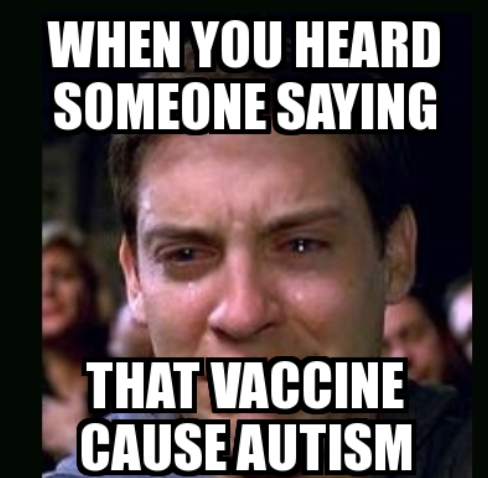

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ (СКАЗАЛИ ВБЕСЕДЕ БРАТЬ В ОБОИХ СЛУЧАЯХ 20) у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [40]:
n = math.ceil(((20**2 + 20**2) * (sts.norm(0,1).ppf(1 - 0.05) + sts.norm(0,1).ppf(1 - 0.2))**2) / 5**2)
print("Общее число наблюдений для одной группы:", n, "\n", "Дней с учетом ежедневного трафика пользователей:", math.ceil(n/100)) 
# (♡-_-♡) 

Общее число наблюдений для одной группы: 198 
 Дней с учетом ежедневного трафика пользователей: 2


__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [41]:
bibrochka_a = np.random.normal(loc=100, scale=20, size=100)
bibrochka_b = np.random.normal(loc=105, scale=20, size=100)
# ヽ(♡‿♡)ノ

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [42]:
np.random.seed(666)
def function(x):
    list_a = np.array([])
    mean_a = np.array([])
    list_b = np.array([])
    mean_b = np.array([])
    testicles = np.array([])
    dada = pd.DataFrame()
    
    for i in range(x):
        
        bibrochka_a = np.random.normal(loc=100, scale=20, size=100)
        list_a = np.append(bibrochka_a, list_a)
        mean = sum(list_a) / len(list_a)
        mean_a = np.append(mean, mean_a)
        
        bibrochka_b = np.random.normal(loc=105, scale=20, size=100)
        list_b = np.append(bibrochka_b, list_b)
        mean = sum(list_b) / len(list_b)
        mean_b = np.append(mean, mean_b)
        
        testik = scipy.stats.ttest_ind(list_a, list_b, equal_var = True)[1]
        testicles = np.append(testicles, testik)
        
    dada['Среднее по метрике А'] = mean_a
    dada['Среднее по метрике Б'] = mean_b
    dada['P-value'] = testicles
    
    return dada
ladidadida = function(50)
# (´｡• ᵕ •｡`) 

In [43]:
ladidadida.head()

,Среднее по метрике А,Среднее по метрике Б,P-value
0,99.684477,104.625963,0.034419
1,99.689379,104.600557,0.005651
2,99.707066,104.591217,0.002662
3,99.746480,104.555838,0.000765
4,99.745718,104.585466,0.002971


------------------------

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

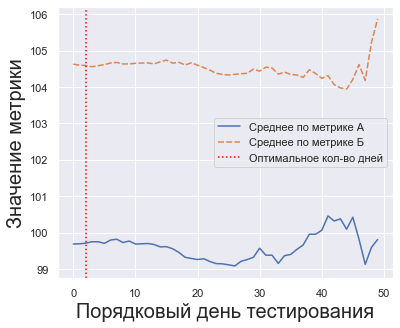

In [44]:
sns.set(rc={'figure.figsize':(6,5)})
sns.lineplot(data = ladidadida[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None
# (´｡• ᵕ •｡`) 

**Вывод:** Исходя из графика визуально можно отметить, что с течением времени выборочные средние не сходятся друг с другом, однако по ЗБЧ сходятся со своим истинным матожиданием 

---------------------

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

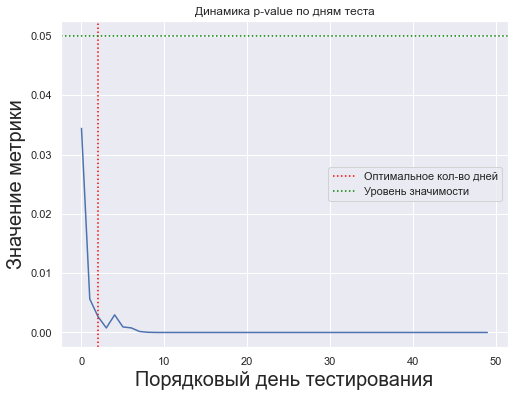

In [45]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None
# (´｡• ᵕ •｡`) 

**Вывод:** Гипотеза отвергается уже во второй день как и следует из точки пересечения pvalue и уровня значимости = 0.05. Это соответсвует посчитанному оптимальному количеству дней исходя из формулы численности группы и имеющегося дневного трафика пользователей

----------------------

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

### Генерация №1

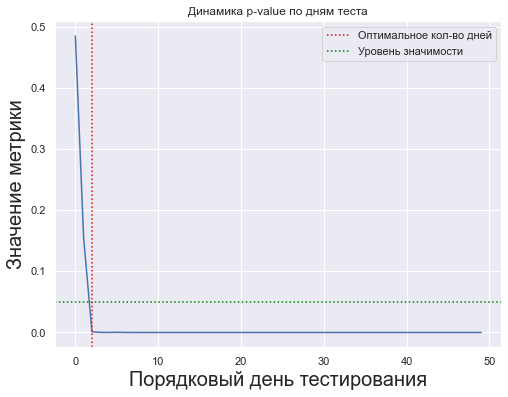

In [46]:
#1
ladidadida1 = function(50)
sns.lineplot(data = ladidadida1['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None
# (◕‿◕)♡

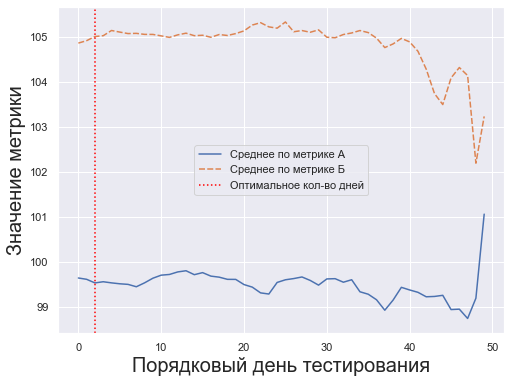

In [47]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida1[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

### Генерация №2

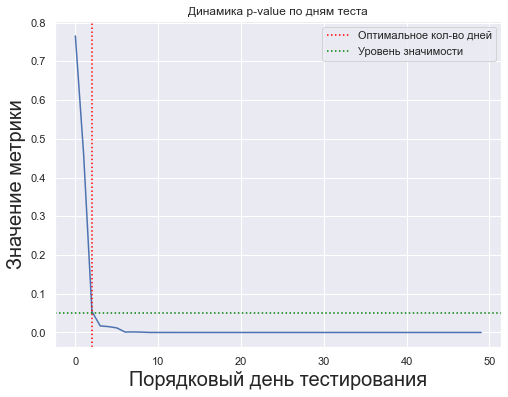

In [48]:
ladidadida2 = function(50)
sns.lineplot(data = ladidadida2['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

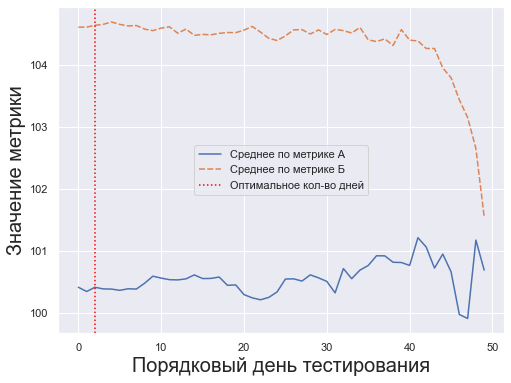

In [49]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida2[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

### Генерация №3

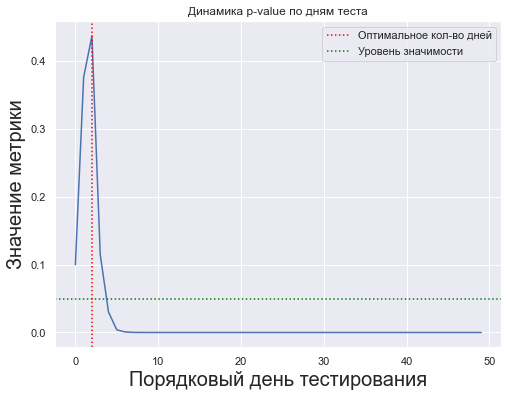

In [50]:
ladidadida3 = function(50)
sns.lineplot(data = ladidadida3['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

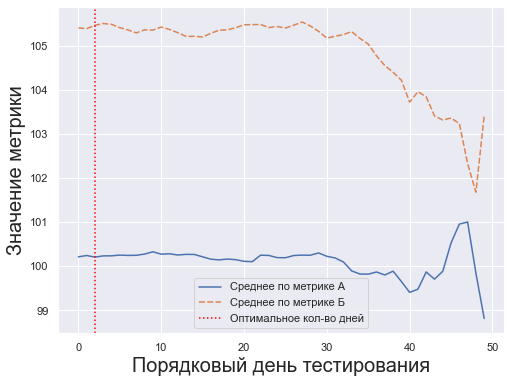

In [51]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida3[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

### Генерация №4

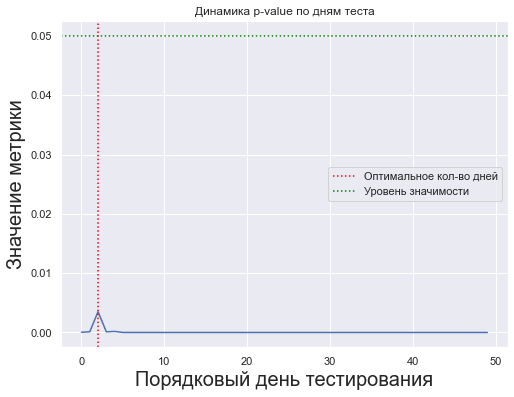

In [52]:
ladidadida4 = function(50)
sns.lineplot(data = ladidadida4['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

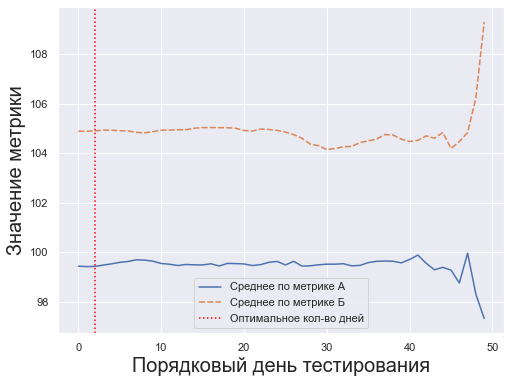

In [53]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida4[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

**Вывод:**
* А: До посчитанного n/100 во всех случаях гипотеза о равенстве матожиданий (отсутствия эффекта) принимается, однако в связи с дробным числом дней (и малым числом) p-value в этот день уже проваливается в критическую область. Этот параметр также зависит от генерации случайной величины в первые дни
* B: С точностью незлья сказать, в каком положении будет находиться значение pvalue во второй день: наше посчитанное значение оптимального количества наблюдений не может 100% точно отразить то, как поведет себя случайная величина. Однако можно сказать одно - действительно примерно на 2 день во всех генерациях p-статистика проваливается за критическую область - туда, где гипотеза об отсутствии эффекта отвергается
* C: Далее на всем промежутке гипотеза отвергается и pvalue примерно равно нулю

---------------------------

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [54]:
np.random.seed(666)
def upd_function(x):
    list_a = np.array([])
    mean_a = np.array([])
    list_b = np.array([])
    mean_b = np.array([])
    testicles = np.array([])
    dada = pd.DataFrame()
    
    for i in range(x):
        
        bibrochka_a = np.random.normal(loc=100, scale=20, size=100)
        list_a = np.append(bibrochka_a, list_a)
        mean = sum(list_a) / len(list_a)
        mean_a = np.append(mean, mean_a)
        
        bibrochka_b = np.random.normal(loc=101, scale=20, size=100)
        list_b = np.append(bibrochka_b, list_b)
        mean = sum(list_b) / len(list_b)
        mean_b = np.append(mean, mean_b)
        
        testik = scipy.stats.ttest_ind(list_a, list_b, equal_var = True)[1]
        testicles = np.append(testicles, testik)
        
    dada['Среднее по метрике А'] = mean_a
    dada['Среднее по метрике Б'] = mean_b
    dada['P-value'] = testicles
    
    return dada
ladidadida5 = upd_function(50)
# ♡ (´｡• ω •｡`) ♡

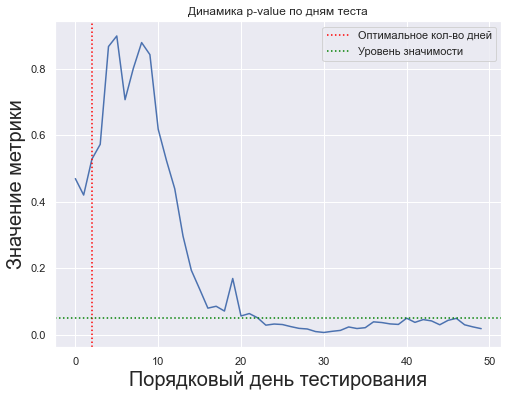

In [55]:
sns.lineplot(data = ladidadida5['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

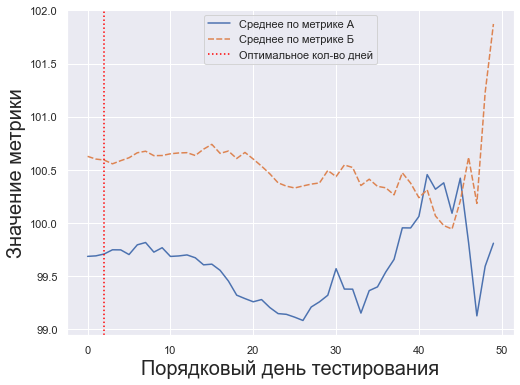

In [56]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida5[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

**Вывод:** В данном случае эффект в разы слабее и именно поэтому в первые дни наиболее вероятно не получится уловить эффект. Однако при некоторых random seedах линия даже не пересекала уровень значимости, то есть гипотеза ни разу не отвергалась. Однако на представленном графике гипотеза отвергается (то есть эффект заметен) только примерно на 22 день. С ростом ожидаемого эффекта необходимо меньше дней тестирования, и наоборот

-------------

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [57]:
np.random.seed(666)
def upd_function1(x):
    list_a = np.array([])
    mean_a = np.array([])
    list_b = np.array([])
    mean_b = np.array([])
    testicles = np.array([])
    dada = pd.DataFrame()
    
    for i in range(x):
        
        bibrochka_a = np.random.normal(loc=100, scale=20, size=100)
        list_a = np.append(bibrochka_a, list_a)
        mean = sum(list_a) / len(list_a)
        mean_a = np.append(mean, mean_a)
        
        bibrochka_b = np.random.normal(loc=100, scale=20, size=100)
        list_b = np.append(bibrochka_b, list_b)
        mean = sum(list_b) / len(list_b)
        mean_b = np.append(mean, mean_b)
        
        testik = scipy.stats.ttest_ind(list_a, list_b, equal_var = True)[1]
        testicles = np.append(testicles, testik)
        
    dada['Среднее по метрике А'] = mean_a
    dada['Среднее по метрике Б'] = mean_b
    dada['P-value'] = testicles
    
    return dada
ladidadida6 = upd_function1(50)
# =^･ｪ･^=

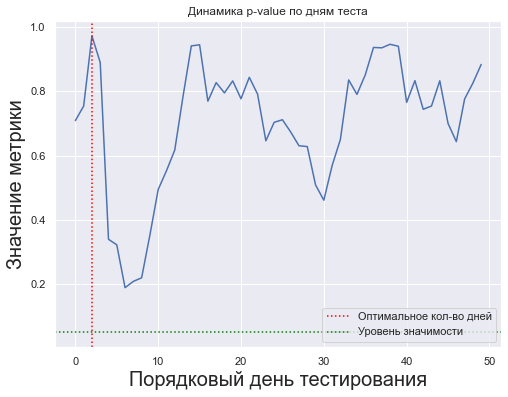

In [58]:
sns.lineplot(data = ladidadida6['P-value'])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.axhline(0.05, 0, 100, color = 'green', linestyle = ':', label = 'Уровень значимости')
plt.title('Динамика p-value по дням теста')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

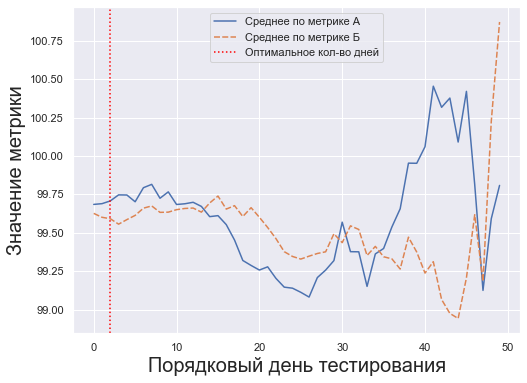

In [59]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data = ladidadida6[['Среднее по метрике А', 'Среднее по метрике Б']])
plt.axvline((n/100), 0, 100, color = 'red', linestyle = ':', label = 'Оптимальное кол-во дней')
plt.xlabel('Порядковый день тестирования', fontsize=20)
plt.ylabel('Значение метрики', fontsize=20)
plt.legend()
plt.show
None

**Вывод:** Учитывая, что и дисперсии, и матожидания у выборок равны, то вероятность того, что гиптеза о равенстве матожиданий может быть отвергнута, стремится к нулю с ростом n по ЗБЧ: E(Xср) -> E(X) при n -> беск.
И именно поэтому невозможно, чтобы pvalue выкатилось за критическую область

----------------

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [60]:
np.random.seed(666)
def last(x):
    list_a = np.array([])
    mean_a = np.array([])
    list_b = np.array([])
    mean_b = np.array([])
    testicles = np.array([])
    dada = pd.DataFrame()
    
    for i in range(x):
        
        bibrochka_a = np.random.normal(loc=100, scale=20, size=100)
        list_a = np.append(bibrochka_a, list_a)
        mean = sum(list_a) / len(list_a)
        mean_a = np.append(mean, mean_a)
        
        bibrochka_b = np.random.normal(loc=100, scale=20, size=100)
        list_b = np.append(bibrochka_b, list_b)
        mean = sum(list_b) / len(list_b)
        mean_b = np.append(mean, mean_b)
        
        testik = scipy.stats.ttest_ind(list_a, list_b, equal_var = True)[1]
        testicles = np.append(testicles, testik)
    
    return testicles[-1]
listik = []
for i in tqdm(range(1000)):
    listik.append(last(50))
# C (・_・)ノ

100%|██████████| 1000/1000 [00:30<00:00, 33.18it/s]


0.00047907489195481894


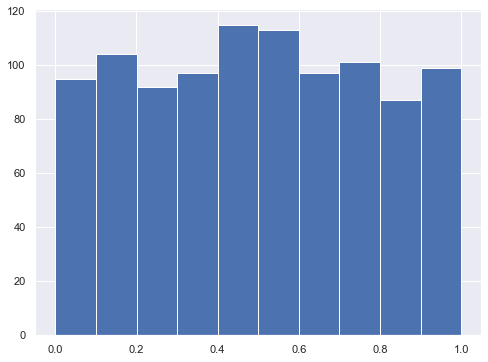

In [61]:
print(min(listik))
plt.hist(listik)
None

**Вывод:** Правдивее никто не объяснит, поэтому прилагаю фотокарточку:

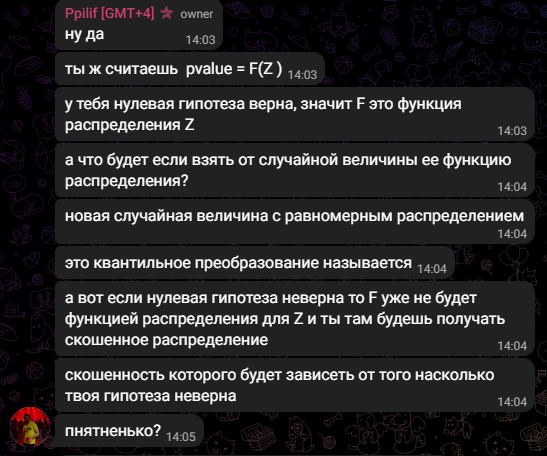